In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/khangphan/.pyenv/versions/3.10.5/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/khangphan/.pyenv/versions/3.10.5/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/khangphan/.pyenv/versions/3.10.5/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/khangphan/.pyenv/versions/3.10.5/lib/python3.10/site-packages/traitlets/config/appl

AttributeError: _ARRAY_API not found

# MAX DISPLAY

In [2]:
max_display=10

In [15]:
files=os.listdir('./processed_data1/0/')
# files.remove('processing.ipynb')
# files.remove('.ipynb_checkpoints')
# if not macos/linux comment the. following code
try:
    files.remove('.DS_Store')
except:
    pass
    # 
files

['s6_E1_A1.csv',
 's1_E1_A1.csv',
 's7_E1_A1.csv',
 's10_E1_A1.csv',
 's2_E1_A1.csv',
 's9_E1_A1.csv',
 's4_E1_A1.csv',
 's3_E1_A1.csv',
 's8_E1_A1.csv',
 's5_E1_A1.csv']

# train_test 1 person!

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df=pd.read_csv('./processed_data1/0/s6_E1_A1.csv')
# df=df[df['Target']!=0]
# df['Target']=df['Target']-1
X=df.drop('Target',axis=1)
y=df['Target']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)


In [18]:
df

,Target,sensor_10_Entropy,sensor_10_Interquartile range,sensor_10_Max,sensor_10_Mean,sensor_10_Mean absolute deviation,sensor_10_Median,sensor_10_Median absolute deviation,sensor_10_Min,sensor_10_Root mean square,...,sensor_9_Entropy,sensor_9_Interquartile range,sensor_9_Max,sensor_9_Mean,sensor_9_Mean absolute deviation,sensor_9_Median,sensor_9_Median absolute deviation,sensor_9_Min,sensor_9_Root mean square,sensor_9_Skewness
0,0.0,0.312447,1.25,2.0,-1.10,0.7620,-1.0,1.0,-4.0,1.523155,...,0.328346,2.00,2.0,-1.01,0.8334,-1.0,1.0,-3.0,1.506652,0.234367
1,0.0,0.353652,2.00,3.0,-1.02,0.9460,-1.0,1.0,-5.0,1.624808,...,0.319045,2.00,2.0,-1.01,0.7938,-1.0,1.0,-4.0,1.466288,-0.129972
2,0.0,0.403544,2.00,4.0,-1.03,1.3142,-1.0,1.0,-7.0,2.032240,...,0.324342,2.00,4.0,-0.91,0.8788,-1.0,1.0,-6.0,1.532971,-0.075442
3,0.0,0.425911,2.00,3.0,-0.98,1.4036,-1.0,1.0,-9.0,2.107131,...,0.368650,2.00,5.0,-1.06,1.0392,-1.0,1.0,-4.0,1.805547,0.795723
4,0.0,0.395745,2.00,2.0,-1.07,1.2654,-1.0,1.0,-5.0,1.951922,...,0.347016,1.00,3.0,-0.77,0.9452,-1.0,1.0,-4.0,1.466288,0.207634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,12.0,0.886686,41.25,79.0,-0.84,23.8496,-2.5,21.0,-87.0,29.523550,...,0.906282,39.50,68.0,-0.70,23.5600,-0.5,20.5,-91.0,30.074241,-0.352445
1513,12.0,0.865614,32.25,58.0,-0.82,19.7564,0.0,15.5,-61.0,24.871671,...,0.856034,33.25,71.0,0.29,20.1210,2.5,18.5,-64.0,25.450933,0.088643
1514,12.0,0.790395,17.00,57.0,-0.97,11.1712,-1.5,8.5,-41.0,14.941553,...,0.797154,15.00,33.0,-1.78,10.1200,-1.5,7.5,-43.0,13.858571,-0.245616
1515,12.0,0.697877,8.00,20.0,-0.98,6.2000,-0.5,4.5,-34.0,8.620905,...,0.744751,10.00,45.0,-0.85,8.0100,-0.5,5.5,-40.0,11.623683,0.385887


In [19]:
from xgboost import XGBClassifier#XGBcalssifier
import xgboost

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       194
         1.0       0.70      0.70      0.70        10
         2.0       0.38      0.43      0.40         7
         3.0       0.57      0.57      0.57         7
         4.0       0.89      0.73      0.80        11
         5.0       0.64      0.69      0.67        13
         6.0       0.77      0.77      0.77        13
         7.0       0.56      0.38      0.45        13
         8.0       0.62      0.45      0.53        11
         9.0       0.00      0.00      0.00         1
        10.0       0.50      0.33      0.40         6
        11.0       0.80      0.40      0.53        10
        12.0       0.75      0.75      0.75         8

    accuracy                           0.83       304
   macro avg       0.62      0.55      0.58       304
weighted avg       0.84      0.83      0.83       304



<Axes: >

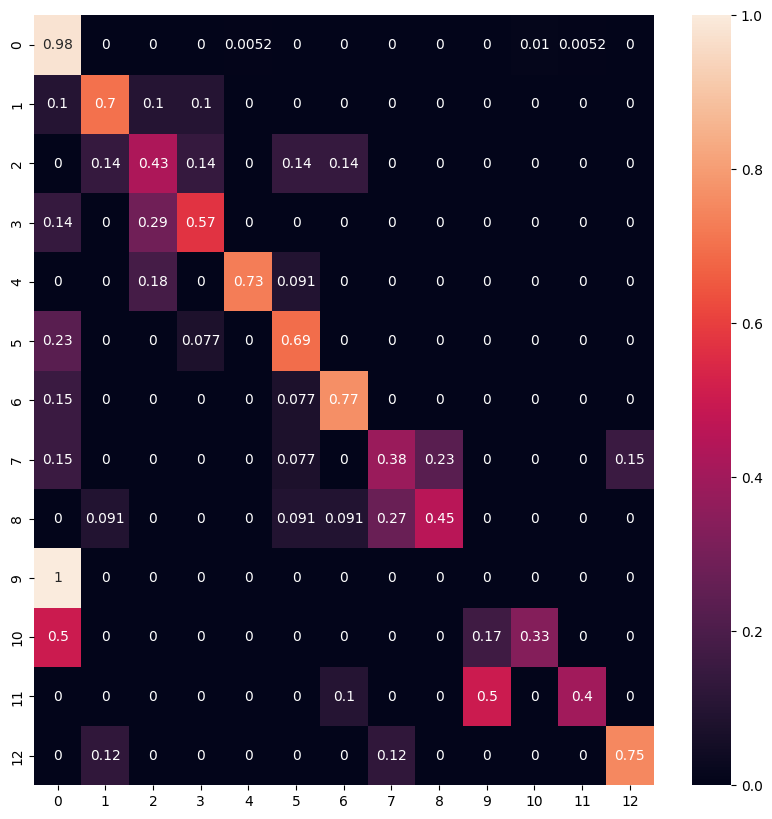

In [20]:
xgb=XGBClassifier( eval_metric='mlogloss', random_state=10)#,callbacks=[early_stop]
xgb.fit(X_train, y_train)#,eval_set=[(data_val_f, label_val)]

pred_xgb=xgb.predict(X_test)

from sklearn import metrics #accuracy measure
print(metrics.classification_report(y_test,pred_xgb))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(y_test,pred_xgb, normalize='true')
sns.heatmap(conf,annot=True)

In [21]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       182
         1.0       0.89      0.62      0.73        13
         2.0       0.75      0.75      0.75         8
         3.0       0.38      0.50      0.43         6
         4.0       0.89      0.73      0.80        11
         5.0       0.82      0.82      0.82        11
         6.0       0.73      1.00      0.84         8
         7.0       1.00      0.47      0.64        17
         8.0       0.62      0.80      0.70        10
         9.0       0.67      0.22      0.33         9
        10.0       0.67      0.22      0.33         9
        11.0       0.73      0.89      0.80         9
        12.0       0.67      0.73      0.70        11

    accuracy                           0.85       304
   macro avg       0.75      0.67      0.68       304
weighted avg       0.85      0.85      0.84       304

              precision    recall  f1-score   support

         0.0       0.96 

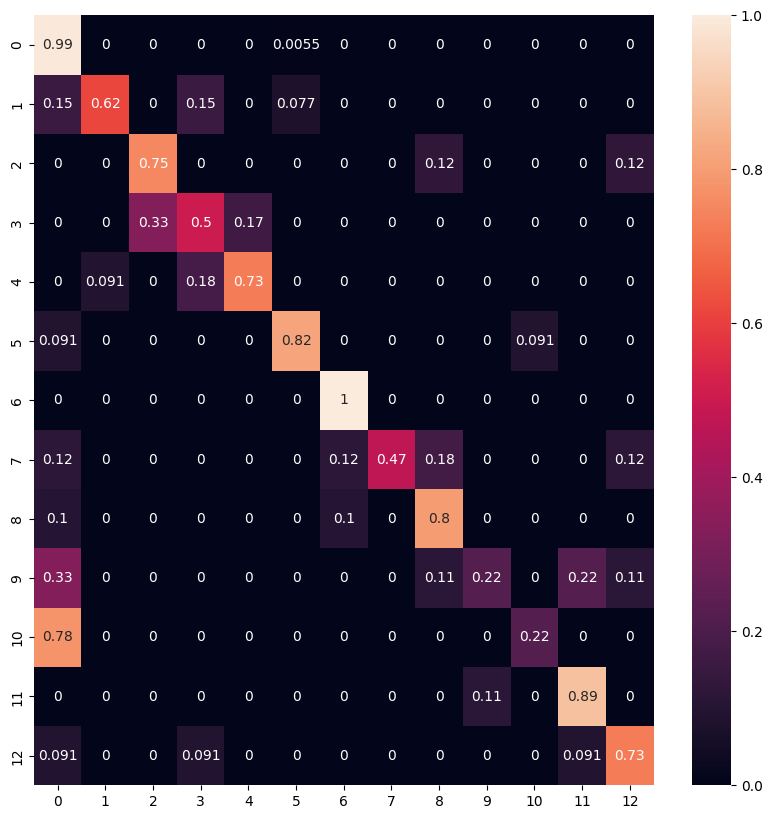

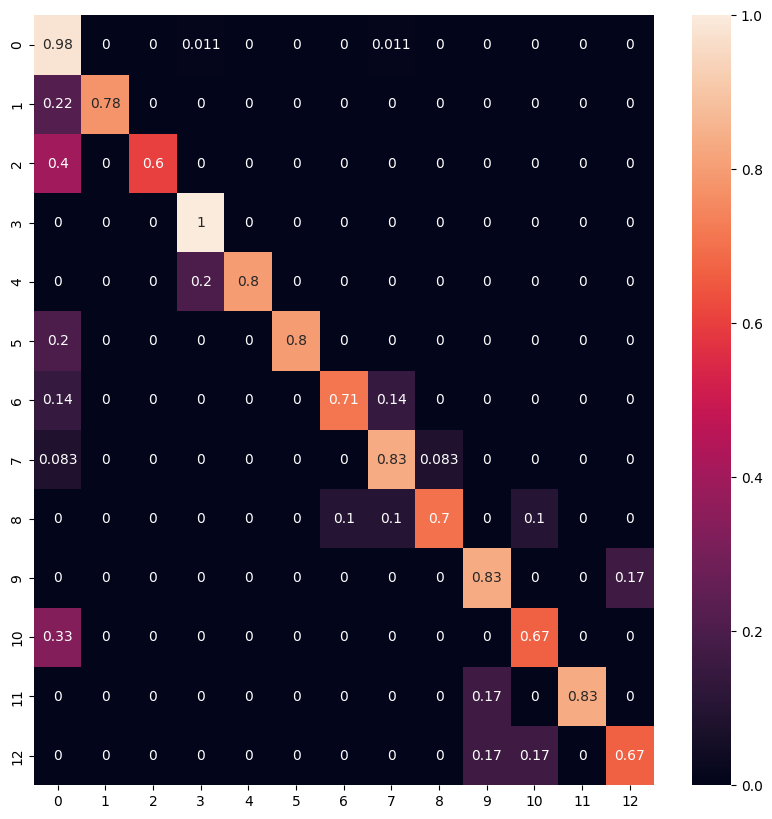

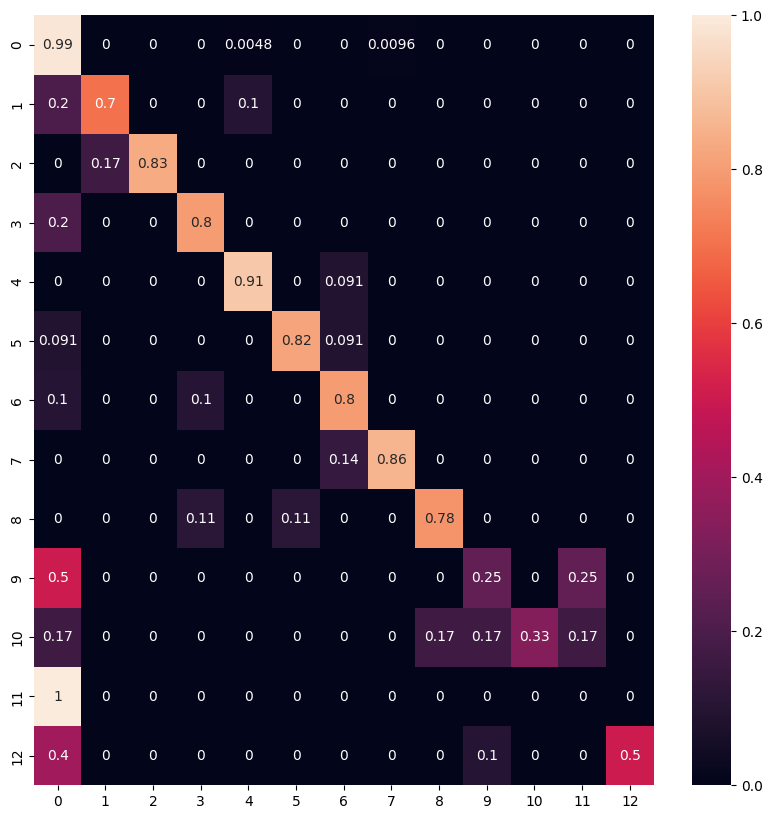

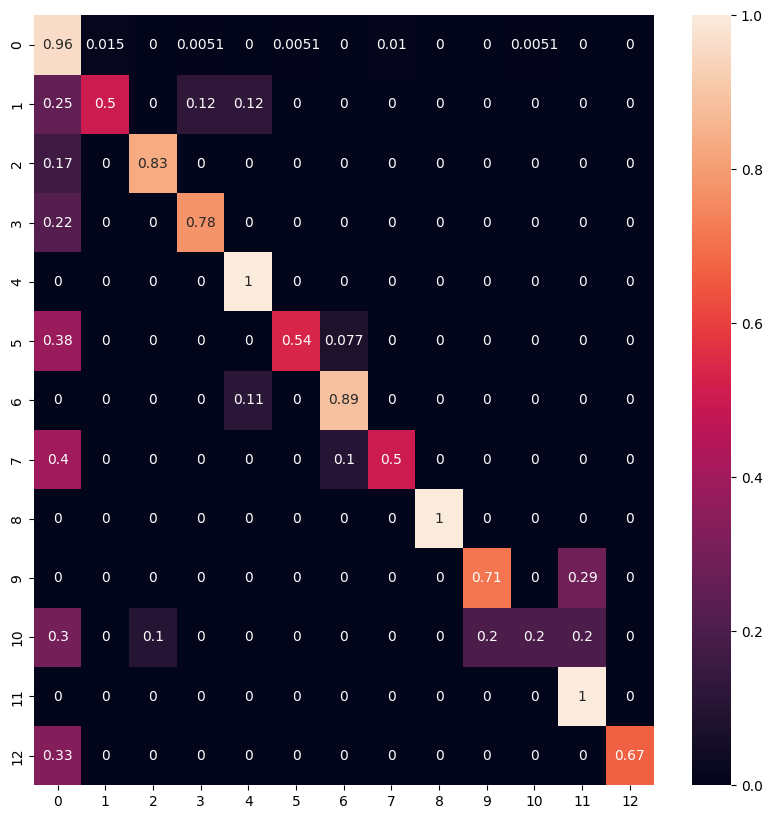

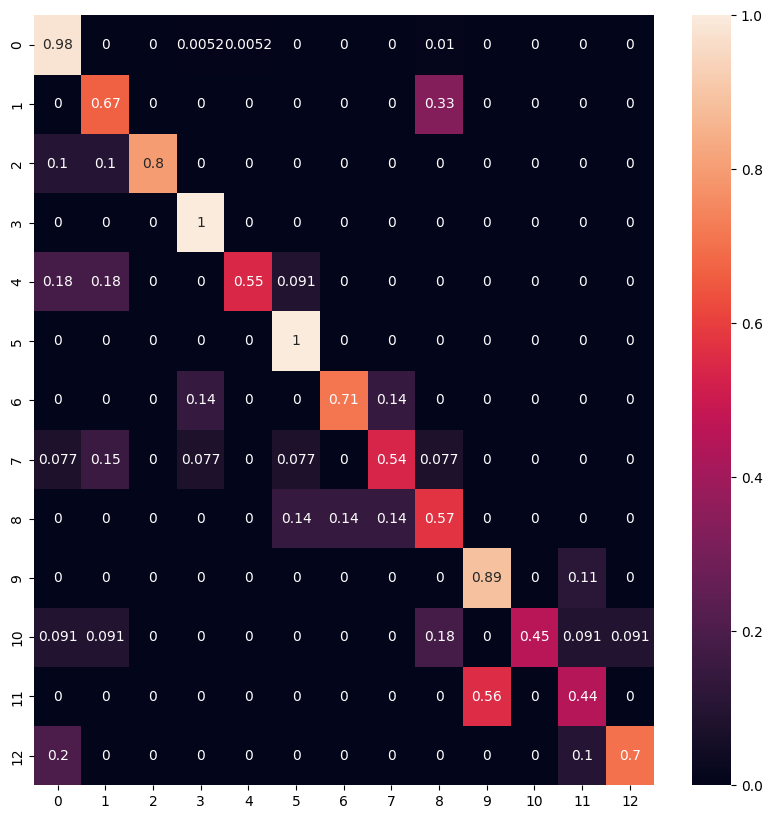

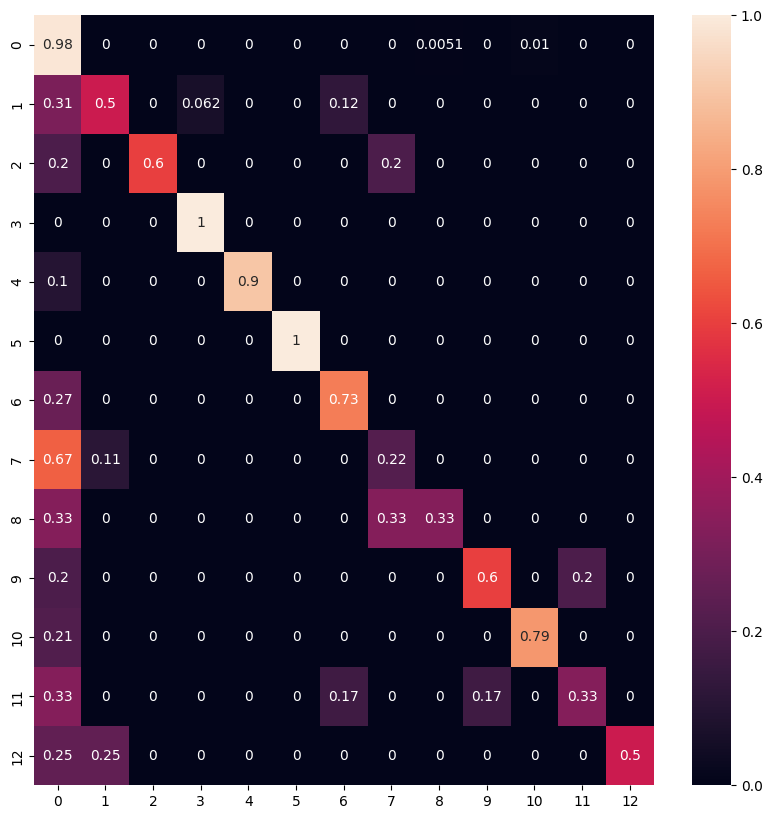

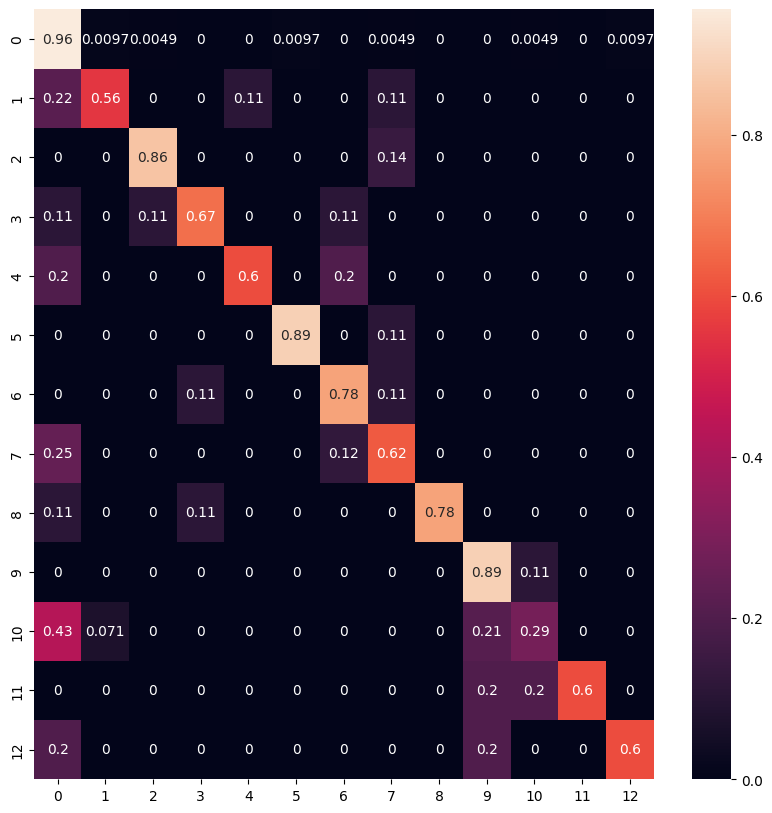

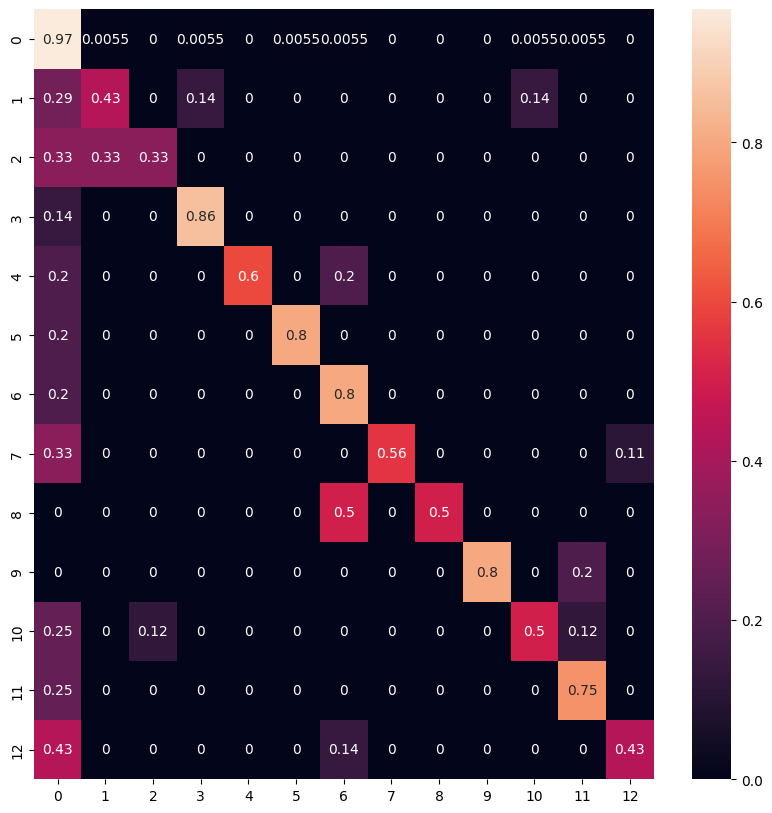

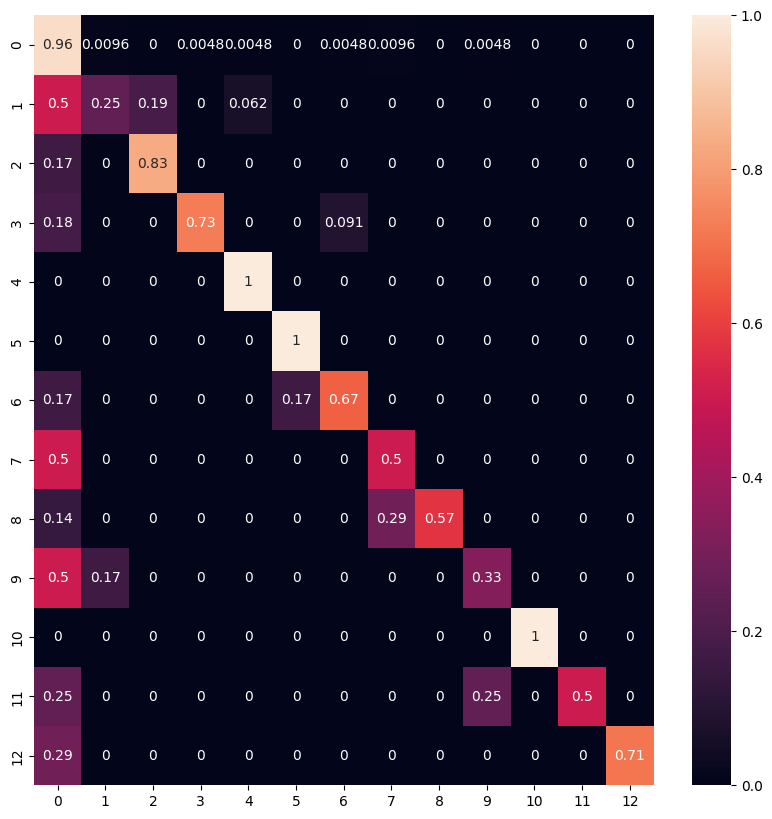

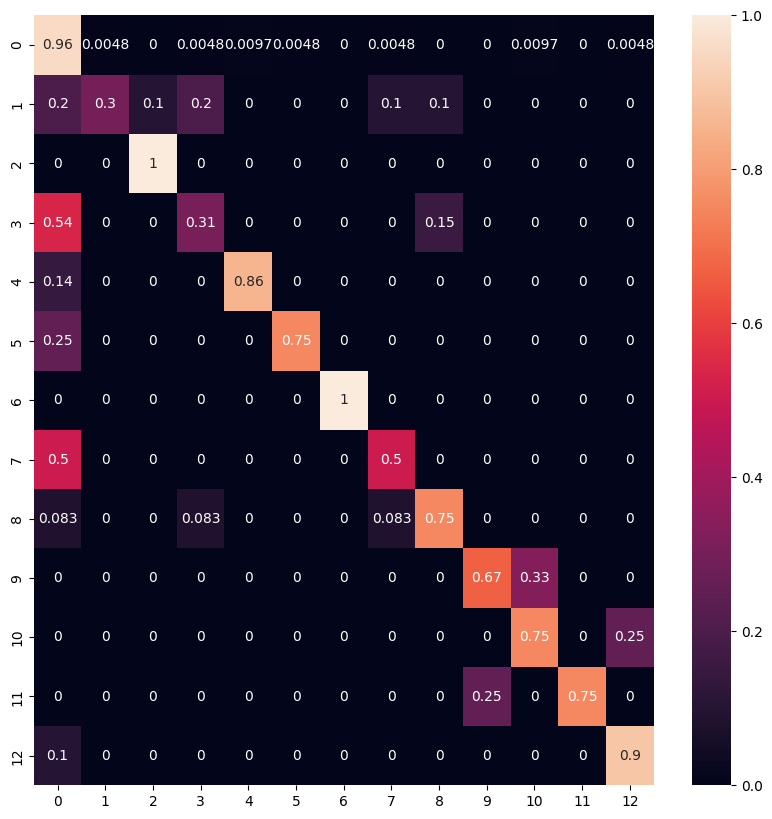

In [22]:
from sklearn import metrics #accuracy measure

acc_=[]
for file in files:
    df=pd.read_csv(f'./processed_data1/0/{file}')
#     df=df[df['Target']!=0]
    X=df.drop('Target',axis=1)
    y=df['Target']
#     y=y-1
    X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

    xgb=XGBClassifier( eval_metric='mlogloss', random_state=10)#,callbacks=[early_stop]
    xgb.fit(X_train, y_train)#,eval_set=[(data_val_f, label_val)]
    pred_xgb=xgb.predict(X_test)
    print(metrics.classification_report(y_test,pred_xgb))
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred_xgb, normalize='true')
    sns.heatmap(conf,annot=True)
    acc_.append(metrics.accuracy_score(y_test,pred_xgb))

In [23]:
Acc_df=pd.DataFrame(acc_,columns=['acc'])
Acc_df.describe()

,acc
count,10.000000
mean,0.872123
std,0.018968
min,0.851974
25%,0.862161
50%,0.867677
75%,0.871212
max,0.915709


# Random Split add all

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap

# add all users into one dataframe
df=None
for file in files:
    df_=pd.read_csv(f'./processed_data1/0/{file}')
    if df is None:
        df=df_
    else:
        df=pd.concat([df,df_], axis=0)
df=df[df['Target']!=0]
df['Target']=df['Target']-1

X=df.drop('Target',axis=1)
y=df['Target']


              precision    recall  f1-score   support

         0.0       0.64      0.74      0.68       158
         1.0       0.79      0.69      0.74       114
         2.0       0.67      0.71      0.69       146
         3.0       0.75      0.79      0.77        95
         4.0       0.67      0.72      0.69       103
         5.0       0.72      0.68      0.70       126
         6.0       0.60      0.74      0.66       122
         7.0       0.84      0.69      0.76       153
         8.0       0.53      0.57      0.55        84
         9.0       0.71      0.74      0.72       136
        10.0       0.63      0.50      0.56        88
        11.0       0.75      0.64      0.69       120

    accuracy                           0.69      1445
   macro avg       0.69      0.68      0.69      1445
weighted avg       0.70      0.69      0.69      1445



<Axes: >

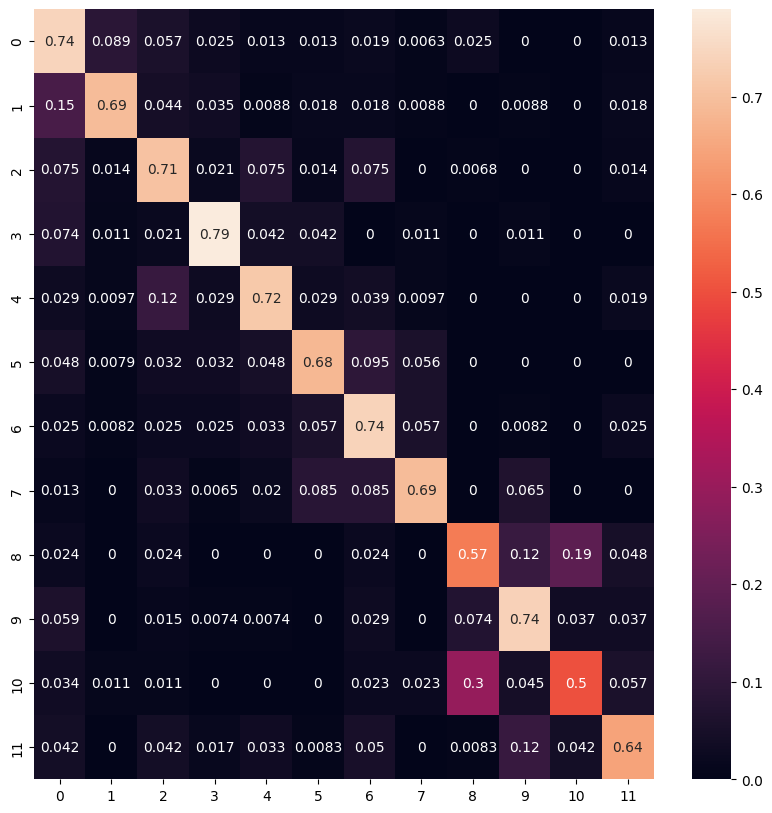

In [25]:

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)

xgb=XGBClassifier( eval_metric='mlogloss', random_state=10)#,callbacks=[early_stop]
xgb.fit(X_train, y_train)#,eval_set=[(data_val_f, label_val)]
pred_xgb=xgb.predict(X_test)
print(metrics.classification_report(y_test,pred_xgb))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(y_test,pred_xgb, normalize='true')
sns.heatmap(conf,annot=True)

# LOSO

In [34]:
Acc=[]
MacroF1=[]
WeightedF1=[]
P=[]
R=[]
for file in files:
    print(file)
    train_df=None
    test_df=pd.read_csv(f'./processed_data1/0/{file}')
    X_test=test_df.drop('Target',axis=1)
    y_test=test_df['Target']
    file_copy=files.copy()
    file_copy.remove(file)
    for file_ in file_copy:
        df=pd.read_csv(f'./processed_data1/0/{file_}')
        if train_df is None:
            train_df=df
        else:
            train_df=pd.concat([train_df,df], axis=0)
#     train_df=train_df[train_df['Target']!=0]
#     train_df['Target']=train_df['Target']-1
#     test_df=test_df[test_df['Target']!=0]
#     test_df['Target']=test_df['Target']-1
    X_train=train_df.drop('Target',axis=1)
    y_train=train_df['Target']
    xgb=XGBClassifier( eval_metric='mlogloss', random_state=10)#,callbacks=[early_stop]
    xgb.fit(X_train, y_train)#,eval_set=[(data_val_f, label_val)]
    pred_xgb=xgb.predict(X_test)
    Acc.append(metrics.accuracy_score(y_test,pred_xgb))
    MacroF1.append(metrics.f1_score(y_test,pred_xgb,average='macro'))
    WeightedF1.append(metrics.f1_score(y_test,pred_xgb,average='weighted'))
    P.append(metrics.precision_score(y_test,pred_xgb,average='weighted'))
    R.append(metrics.recall_score(y_test,pred_xgb,average='weighted'))

s6_E1_A1.csv


/Users/khangphan/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


s1_E1_A1.csv
s7_E1_A1.csv
s10_E1_A1.csv
s2_E1_A1.csv


/Users/khangphan/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


s9_E1_A1.csv
s4_E1_A1.csv


/Users/khangphan/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


s3_E1_A1.csv
s8_E1_A1.csv
s5_E1_A1.csv


In [37]:
df_result=pd.DataFrame(data=np.array([Acc,WeightedF1,P,R]).T,columns=['Accuracy', 'Weighted F1'
                                                                             ,'WeightedPricision','Weighted Recall'])
df_result

,Accuracy,Weighted F1,WeightedPricision,Weighted Recall
0,0.629532,0.627031,0.669980,0.629532
1,0.707373,0.686769,0.683980,0.707373
2,0.762566,0.725783,0.704880,0.762566
3,0.670447,0.622472,0.621055,0.670447
4,0.670937,0.657108,0.675846,0.670937
5,0.738690,0.715805,0.706326,0.738690
6,0.722955,0.707534,0.724833,0.722955
7,0.690784,0.692305,0.712165,0.690784
8,0.752368,0.683419,0.662715,0.752368
9,0.765657,0.711820,0.711264,0.765657


In [ ]:
# reference paper: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=5271916
# This only used as the test for the test purpose only, dont use in production
# Data source nina pro dataset